In [289]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from src.reader import DSReader
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [290]:
# loading the dataset
dataset_path = os.path.abspath("./tests/datasets/emails.csv")
emails_data = DSReader(dataset_path)

In [291]:
# clearing data
emails_data.to_lower()
emails_data.remove_digits()
emails_data.remove_punctuation_marks()
emails_data.remove_duplicates()
emails_data.remove_stopwords()

,email,label
0,save life insurance spend life quote savings e...,1
1,fight risk cancer http www adclick cfm slim gu...,1
2,fight risk cancer http www adclick cfm slim gu...,1
3,adult club offers free membership instant acce...,1
4,thought might like slim guaranteed lose lbs da...,1
...,...,...
6033,isilo palm pocket windows enters beta isilo wi...,0
6034,effector vol november ren eff orga publication...,0
6039,extended free seat sale thursday november deta...,0
6042,one ten insignificant matters heavily overemph...,0


In [292]:
X, y = emails_data.vectorize()

In [301]:
# test parameters
test_size = [0.15, 0.25, 0.50, 0.75, 0.95]


    Classification score for RandomForestClassifier, 
    with test size = 0.15%:
    score = 0.9822335025380711

    Classification score for RandomForestClassifier, 
    with test size = 0.25%:
    score = 0.9756283320639756

    Classification score for RandomForestClassifier, 
    with test size = 0.5%:
    score = 0.9733434881949733

    Classification score for RandomForestClassifier, 
    with test size = 0.75%:
    score = 0.9598882965219598

    Classification score for RandomForestClassifier, 
    with test size = 0.95%:
    score = 0.9092002405291641

Mean score:  0.9600587719696287
Best score:  0.9822335025380711
Low score:  0.9092002405291641


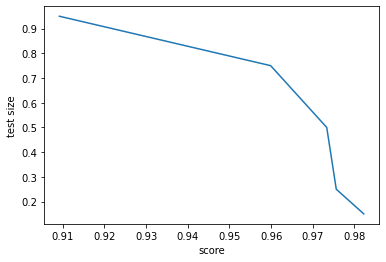

In [302]:
scores = []

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    
    pipeline_RandomForestClassifier = Pipeline([('vect', CountVectorizer()),
                                                ('tfidf', TfidfTransformer()),
                                                ('clf', RandomForestClassifier(random_state=1))])
    
    
    pipeline_RandomForestClassifier.fit(X_train.ravel(), y_train)
    
    score = pipeline_RandomForestClassifier.score(X_test.ravel(), y_test)

    scores.append(score)
    print(f"""
    Classification score for RandomForestClassifier, 
    with test size = {size}%:
    score = {score}""")
        
print("\nMean score: ", sum(scores) / len(scores))
print("Best score: ", max(scores))
print("Low score: ", min(scores))

plt.plot(scores, test_size)
plt.xlabel("score")
plt.ylabel("test size")
plt.show()
    
scores.clear()


    Classification score for MultinomialNB, 
    with test size = 0.15%:
    score = 0.9822335025380711

    Classification score for MultinomialNB, 
    with test size = 0.25%:
    score = 0.9794364051789795

    Classification score for MultinomialNB, 
    with test size = 0.5%:
    score = 0.9741051028179741

    Classification score for MultinomialNB, 
    with test size = 0.75%:
    score = 0.9682660573749683

    Classification score for MultinomialNB, 
    with test size = 0.95%:
    score = 0.9542994588093806

Mean score:  0.9716681053438748
Best score:  0.9822335025380711
Low score:  0.9542994588093806


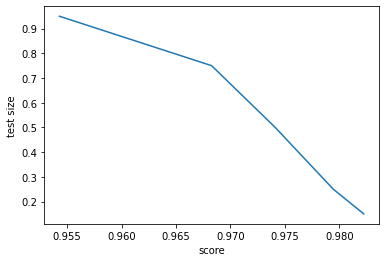

In [303]:
scores = []

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    
    pipeline_MultinomialNB = Pipeline([('vect', CountVectorizer()),
                                       ('clf', MultinomialNB())])
    
    pipeline_MultinomialNB.fit(X_train.ravel(), y_train)
    
    score = pipeline_MultinomialNB.score(X_test.ravel(), y_test)

    scores.append(score)
    print(f"""
    Classification score for MultinomialNB, 
    with test size = {size}%:
    score = {score}""")
    
print("\nMean score: ", sum(scores) / len(scores))
print("Best score: ", max(scores))
print("Low score: ", min(scores))
        
plt.plot(scores, test_size)
plt.xlabel("score")
plt.ylabel("test size")
plt.show()
    
scores.clear()


    Classification score for SGDClassifier1, 
    with test size = 0.15%:
    score = 0.9885786802030457

    Classification score for SGDClassifier1, 
    with test size = 0.25%:
    score = 0.9794364051789795

    Classification score for SGDClassifier1, 
    with test size = 0.5%:
    score = 0.9748667174409749

    Classification score for SGDClassifier1, 
    with test size = 0.75%:
    score = 0.9611576542269612

    Classification score for SGDClassifier1, 
    with test size = 0.95%:
    score = 0.9051914211264782

Mean score:  0.9618461756352878
Best score:  0.9885786802030457
Low score:  0.9051914211264782


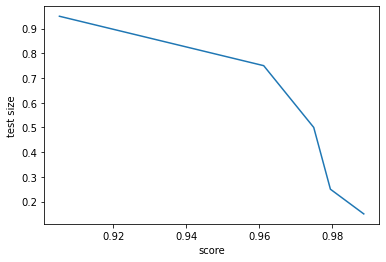

In [304]:
scores = []

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    
    pipeline_SGDClassifier1 = Pipeline([('vect', CountVectorizer()),
                                       ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                             alpha=1e-3, random_state=1))])
    
    pipeline_SGDClassifier1.fit(X_train.ravel(), y_train)
    
    score = pipeline_SGDClassifier1.score(X_test.ravel(), y_test)

    scores.append(score)
    print(f"""
    Classification score for SGDClassifier1, 
    with test size = {size}%:
    score = {score}""")
    
print("\nMean score: ", sum(scores) / len(scores))
print("Best score: ", max(scores))
print("Low score: ", min(scores))
        
plt.plot(scores, test_size)
plt.xlabel("score")
plt.ylabel("test size")
plt.show()
    
scores.clear()


    Classification score for SGDClassifier2, 
    with test size = 0.15%:
    score = 0.9809644670050761

    Classification score for SGDClassifier2, 
    with test size = 0.25%:
    score = 0.9763899466869764

    Classification score for SGDClassifier2, 
    with test size = 0.5%:
    score = 0.9744859101294745

    Classification score for SGDClassifier2, 
    with test size = 0.75%:
    score = 0.969027671997969

    Classification score for SGDClassifier2, 
    with test size = 0.95%:
    score = 0.9488875526157546

Mean score:  0.9699511096870502
Best score:  0.9809644670050761
Low score:  0.9488875526157546


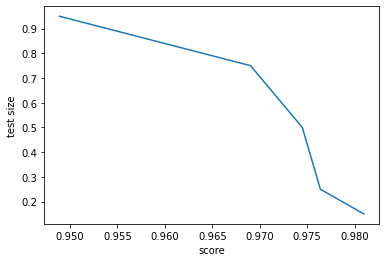

In [305]:
scores = []

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    
    pipeline_SGDClassifier2 = Pipeline([('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                             alpha=1e-3, random_state=1))])
    
    pipeline_SGDClassifier2.fit(X_train.ravel(), y_train)
    
    score = pipeline_SGDClassifier2.score(X_test.ravel(), y_test)

    scores.append(score)
    print(f"""
    Classification score for SGDClassifier2, 
    with test size = {size}%:
    score = {score}""")
    
print("\nMean score: ", sum(scores) / len(scores))
print("Best score: ", max(scores))
print("Low score: ", min(scores))
        
plt.plot(scores, test_size)
plt.xlabel("score")
plt.ylabel("test size")
plt.show()
    
scores.clear()


    Classification score for SGDClassifier3, 
    with test size = 0.15%:
    score = 0.9822335025380711

    Classification score for SGDClassifier3, 
    with test size = 0.25%:
    score = 0.9779131759329779

    Classification score for SGDClassifier3, 
    with test size = 0.5%:
    score = 0.964965727341965

    Classification score for SGDClassifier3, 
    with test size = 0.75%:
    score = 0.9588728103579589

    Classification score for SGDClassifier3, 
    with test size = 0.95%:
    score = 0.9248346361996392

Mean score:  0.9617639704741224
Best score:  0.9822335025380711
Low score:  0.9248346361996392


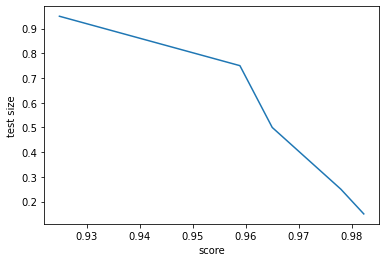

In [306]:
scores = []

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    
    pipeline_SGDClassifier3 = Pipeline([('vect', CountVectorizer()),
                                       ('chi', SelectKBest(chi2, k=8500)),
                                       ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                             alpha=1e-3, random_state=1))])
    
    pipeline_SGDClassifier3.fit(X_train.ravel(), y_train)
    
    score = pipeline_SGDClassifier3.score(X_test.ravel(), y_test)

    scores.append(score)
    print(f"""
    Classification score for SGDClassifier3, 
    with test size = {size}%:
    score = {score}""")
    
print("\nMean score: ", sum(scores) / len(scores))
print("Best score: ", max(scores))
print("Low score: ", min(scores))
        
plt.plot(scores, test_size)
plt.xlabel("score")
plt.ylabel("test size")
plt.show()
    
scores.clear()

Random Forest Classifier:
  - Mean score:  0.9600587719696287   0(---)
  - Best score:  0.9822335025380711   2(WIN 2-nd)
  - Low score:  0.9092002405291641    0(---)
  
score = 2

MultinomialNB:
  - Mean score:  0.9716681053438748  3(WIN 1-st)
  - Best score:  0.9822335025380711  2(WIN 2-nd)
  - Low score:  0.9542994588093806   3(WIN 1-st)
  
score = 8

SGDClassifier:
  - Mean score:  0.9618461756352878  1(WIN 3-rd)
  - Best score:  0.9885786802030457  3(WIN 1-st)
  - Low score:  0.9051914211264782   1(WIN 3-rd)
  
score = 4

SGDClassifier (TfidfTransformer):
  - Mean score:  0.9699511096870502  2(WIN 2-nd)
  - Best score:  0.9809644670050761  1(WIN 3-rd)
  - Low score:  0.9488875526157546   2(WIN 2-nd)
  
score = 5

SGDClassifier (SelectKBest):
  - Mean score:  0.9617639704741224   0(---)
  - Best score:  0.9822335025380711   2(WIN 2-nd)
  - Low score:  0.9248346361996392    1(WIN 3-rd)  
  
score = 3


In [308]:
# USER INPUT

# email_text = input('Paste your email text:\n')

# df_email = pd.DataFrame({'email': [email_text],
#                          'label': '?'})
                        
# df_email.to_csv(path_or_buf='user.csv', index=False)
                        
# dataset_path = os.path.abspath("user.csv")

# emails_user = DSReader(dataset_path)
                        
# emails_user.to_lower()
# emails_user.remove_digits()
# emails_user.remove_punctuation_marks()
# emails_user.remove_duplicates()
# emails_user.remove_stopwords()

# predict = pipeline_SGDClassifier.predict(emails_user.dataset['email'])

# print(predict)
# print("I think this is SPAM" if predict == [1] else "I think this is NOT SPAM" )

# print(emails_user.dataset['email'])

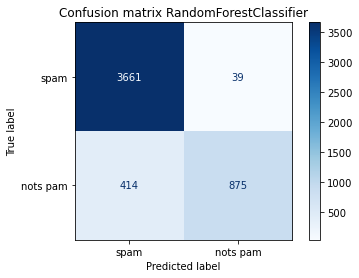

Recall    = 0.8984049079754601
Precision = 0.9894594594594595
F-measure = 0.9417363344051447


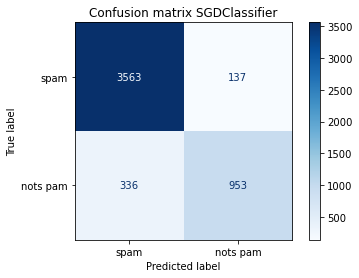

Recall    = 0.9138240574506283
Precision = 0.962972972972973
F-measure = 0.9377549677589156


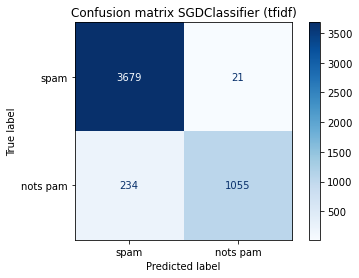

Recall    = 0.9401993355481728
Precision = 0.9943243243243243
F-measure = 0.9665046630763168


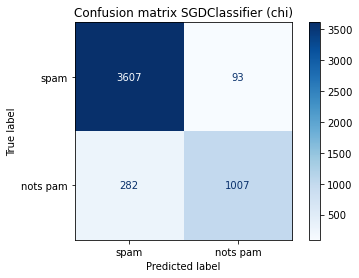

Recall    = 0.9274877860632553
Precision = 0.9748648648648649
F-measure = 0.9505863750164711


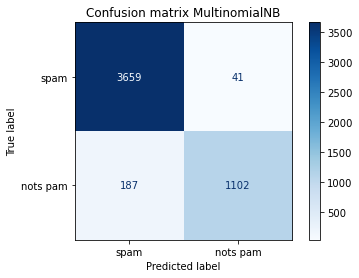

Recall    = 0.9513780551222049
Precision = 0.9889189189189189
F-measure = 0.9697853167240922


In [307]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class_names = ['spam', 'nots pam']

titles_options = [("Confusion matrix RandomForestClassifier", None, pipeline_RandomForestClassifier),
                  ("Confusion matrix SGDClassifier", None, pipeline_SGDClassifier1),
                  ("Confusion matrix SGDClassifier (tfidf)", None, pipeline_SGDClassifier2),
                  ("Confusion matrix SGDClassifier (chi)", None, pipeline_SGDClassifier3),
                  ("Confusion matrix MultinomialNB", None, pipeline_MultinomialNB)]

for title, normalize, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test.ravel(), y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    matrix = disp.confusion_matrix
    
    TP, FP, FN, TN = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    
    disp.ax_.set_title(title)
    
    recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    f_measure = 2 * recall * precision/(precision + recall)
    
    plt.show()
    
    print(f"Recall    = {recall}\nPrecision = {precision}\nF-measure = {f_measure}")